<a href="https://colab.research.google.com/github/wonwookim/DataMining/blob/main/data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Heatmap

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

flights = sns.load_dataset('flights')
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [ ]:
df1 = flights.pivot('month', 'year', 'passengers') #행, 열, 값
df1

<ipython-input-13-c1442035307f>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df1 = flights.pivot('month', 'year', 'passengers') #행, 열, 값


year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


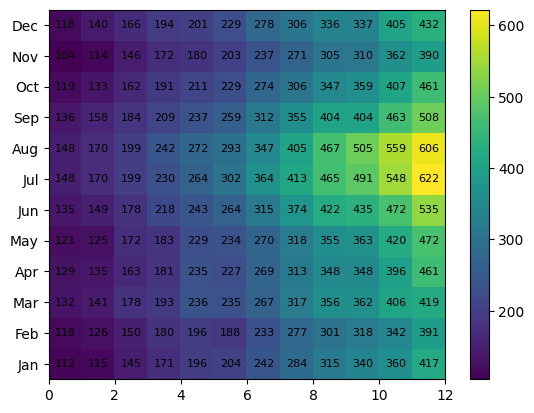

In [ ]:
plt.pcolor(df1) # x축은 열 값, y축은 행 값
# plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns)
# plt.xticks(np.arange(0.5, len(df1.columns), 1), df1.columns)
plt.yticks(np.arange(0.5, len(df1.index), 1), df1.index)
plt.colorbar()
for i in range(len(df1.index)):
  for j in range(len(df1.columns)):
    plt.text(j + 0.5, i + 0.5, df1.iloc[i,j], horizontalalignment = 'center', verticalalignment = 'center', fontsize= 8)

plt.show()

##Pie Plot

([<matplotlib.patches.Wedge at 0x7f5ad6998f10>,
 [Text(0.699678120080992, 0.8487935722423499, 'company A'),
  Text(-1.0798347729097384, 0.2096589211433035, 'company B'),
  Text(-0.150321112367543, -1.0896804867375502, 'company C'),
  Text(0.8857693540529563, -0.6522366529263812, 'company D')],
 [Text(0.3816426109532683, 0.46297831213219076, '28.1%'),
  Text(-0.5890007852234936, 0.114359411532711, '37.8%'),
  Text(-0.08199333401865981, -0.5943711745841183, '14.0%'),
  Text(0.48314692039252155, -0.35576544705075336, '20.2%')])

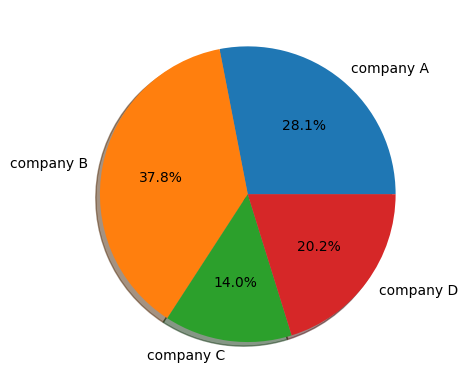

In [ ]:
ratio = [28.39, 38.234, 14.123, 20.444]
labels = ['company A', 'company B', 'company C', 'company D']
plt.pie(ratio, labels = labels, autopct = '%.1f%%', shadow = True)

##Subplot

In [ ]:
figure = plt.figure()

<Figure size 640x480 with 0 Axes>

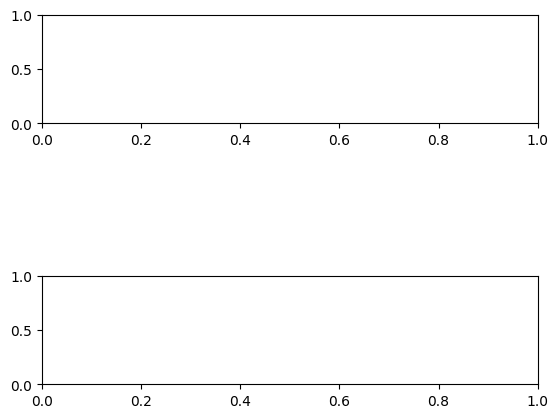

In [ ]:
figure.add_subplot(3,1,1) #행 개수, 열 개수, 위치치
figure.add_subplot(3,1,3)
figure

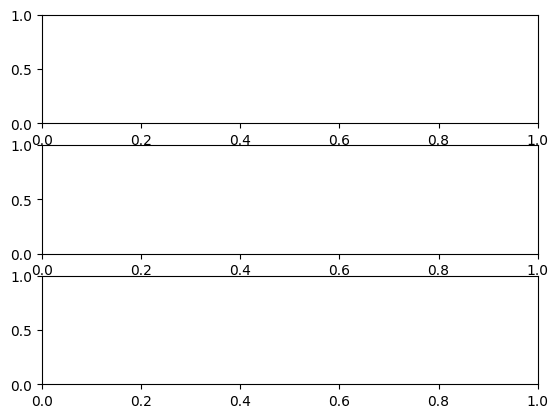

In [ ]:
fig, ax = plt.subplots(3,1) #subplot과 subplots는 동일한 결과를 보여줌줌
plt.show()

/usr/local/lib/python3.9/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


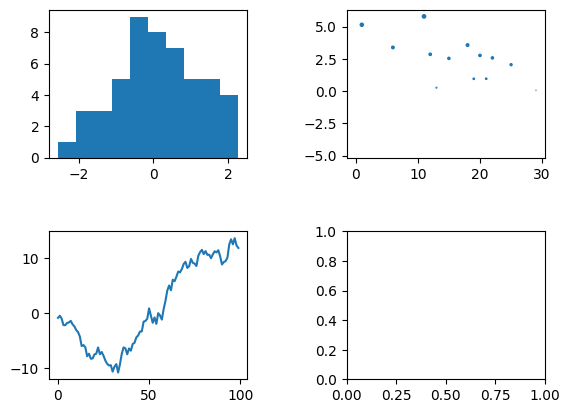

In [ ]:
fig, ax = plt.subplots(2,2)

np.random.seed(0)

a = np.random.randn(50)
b = np.random.randn(100)
c = np.random.randn(30)

ax[0,0].hist(a)
ax[0,1].scatter(np.arange(30), 3 * c, s = 3 * c)
ax[1,0].plot(b.cumsum())
plt.subplots_adjust(wspace = 0.5, hspace = 0.5) #subplot 간 간격 조정

## Drawing Line Chart with Pandas

<Axes: >

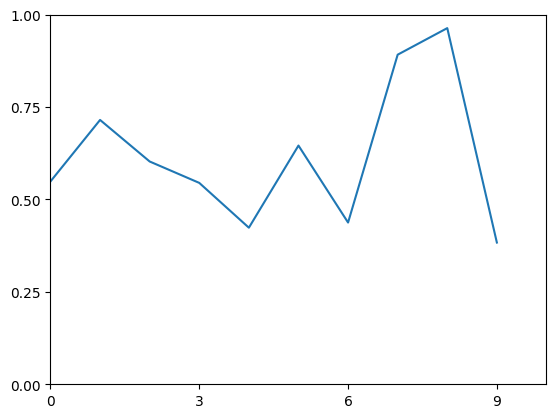

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

s = pd.Series(np.random.rand(10))
s.plot(xticks = [0,3,6,9], yticks = [0, 0.25, 0.5, 0.75, 1], xlim = [0, 10])

<Axes: >

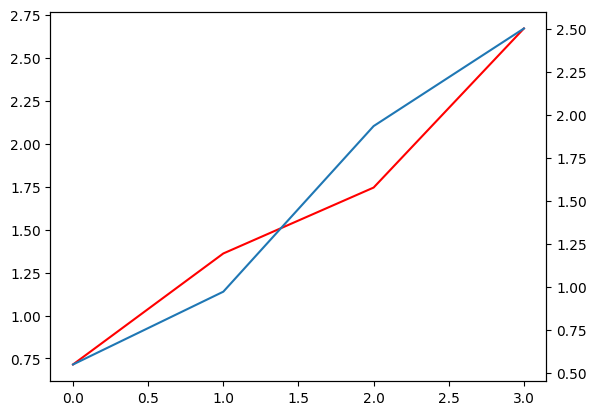

In [24]:
np.random.seed(0)
s = np.random.rand(16).reshape(4,4) 
#s = np.random.rand(4,4) 같은 의미
# s.cumsum() 각각의 값을 다 더하기
# print(s.cumsum(0)) axis = 0 으로만 더하기
df = pd.DataFrame(s.cumsum(0), columns = ['A','B','C','D'])
df.B.plot(style = 'r') # style은 색상
df.A.plot(secondary_y = True) #축을 다시 그림

## Drawing Bar Chart in Pandas

<Axes: >

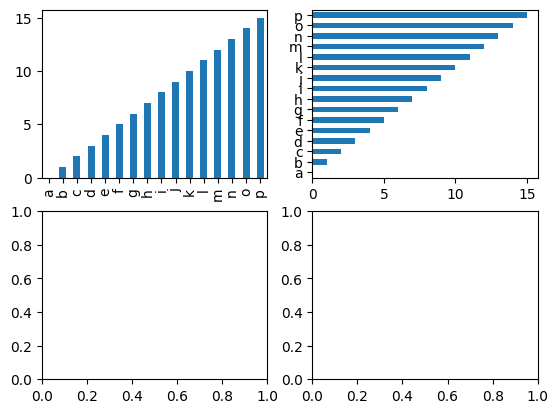

In [32]:
fig, axes = plt.subplots(2,2)

data = pd.Series(np.arange(16), index = list('abcdefghijklmnop'))
data.plot(kind = 'bar', ax = axes[0,0])
data.plot(kind = 'barh', ax = axes[0,1])

<Axes: xlabel='Group'>

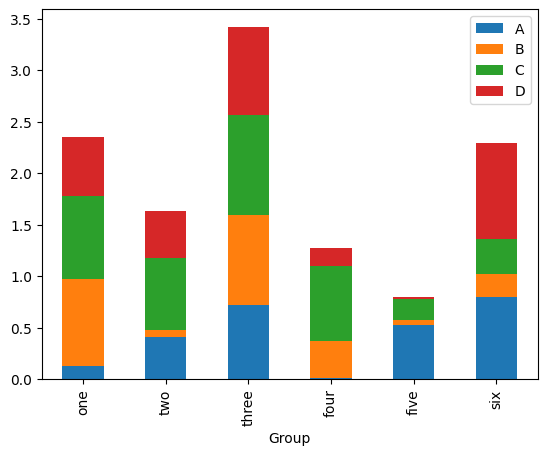

In [41]:
df = pd.DataFrame(np.random.rand(6,4), columns = ['A','B','C','D'],
                  index = pd.Index(['one', 'two', 'three','four', 'five','six'], name = 'Group'))
df.plot(kind = 'bar', stacked = True)

In [42]:
df = pd.DataFrame({'a' : np.random.randn(1000)+ 1,
                   'b' : np.random.randn(1000),
                   'c' : np.random.randn(1000)+ 1})
df

,a,b,c
0,1.396007,1.404546,0.501788
1,-0.093062,0.146441,0.568586
2,-0.491258,-1.481246,0.721018
3,1.439392,-1.272558,1.529834
4,1.166673,1.518759,0.260605
...,...,...,...
995,1.531178,-0.799786,0.387361
996,0.871758,-0.281575,0.618710
997,0.728228,-0.589387,-0.248949
998,1.217180,0.444781,0.669762


<Axes: ylabel='Frequency'>

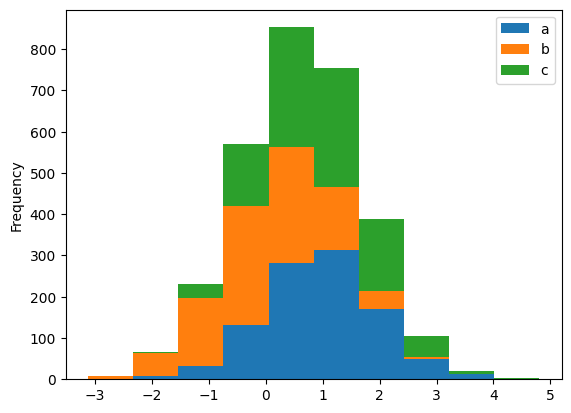

In [47]:
df.plot(kind = 'hist', stacked = True)

In [48]:
import seaborn as sns
iris = sns.load_dataset('iris')

iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<Axes: xlabel='sepal_length', ylabel='sepal_width'>

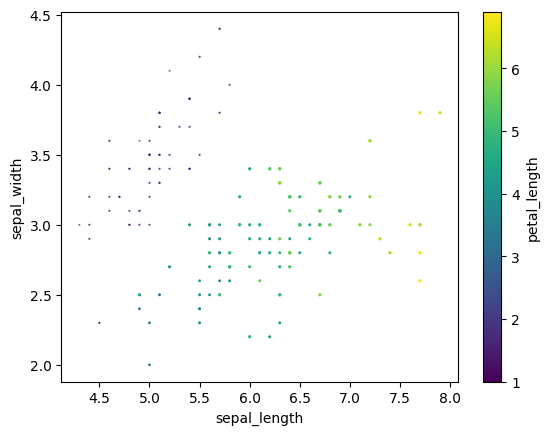

In [51]:
iris.plot(kind = 'scatter', x = 'sepal_length', y = 'sepal_width', c = 'petal_length', s = 'petal_width')

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

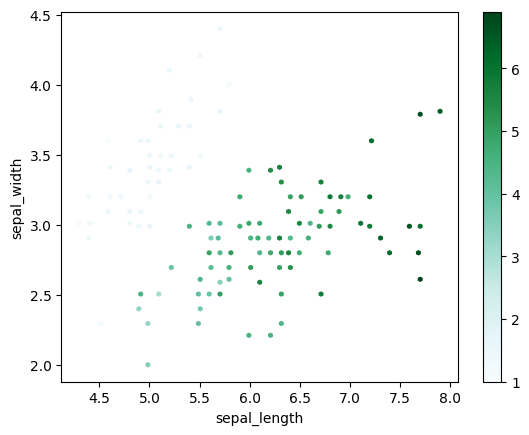

In [53]:
iris.plot(kind = 'hexbin', x = 'sepal_length', y = 'sepal_width', C = 'petal_length')

<Axes: >

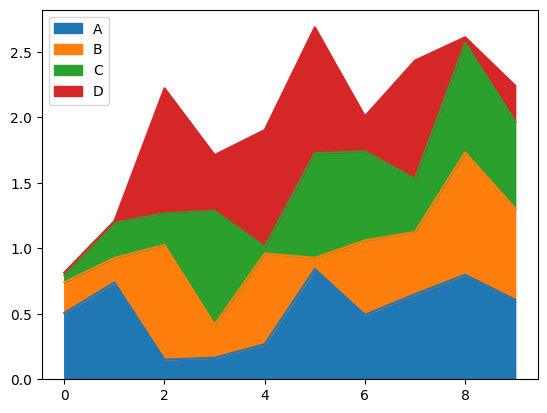

In [55]:
df = pd.DataFrame(np.random.rand(10,4), columns = ['A', 'B', 'C', 'D'])

df.plot(kind = 'area') #디폴트가 stacked